In [13]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [14]:
def initialize_e(circuit, qubits):
    for qubit in qubits:
        circuit.h(qubit)
    return circuit

In [15]:
# Creating the oracle
qc = QuantumCircuit(4)
qc.x(1)
qc.mct(list(range(3)), 3)
qc.x(1)
qc.draw()
oracle = qc.to_gate()
oracle.name = "Search Box"

In [16]:
def diffuser(nqubits):
    circuit = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):
        circuit.h(qubit)
    for qubit in range(nqubits-1):
        circuit.x(qubit)
    
    circuit.mct(list(range(3)), 3)
    
    for qubit in range(nqubits-1):
        circuit.x(qubit)
    for qubit in range(nqubits-1):
        circuit.h(qubit)
    circuit.draw()
    
    # We will return the diffuser as a gate
    U_s = circuit.to_gate()
    U_s.name = "Diffuser"
    return U_s

In [17]:
n = 3
q = QuantumRegister(n) # n qubits
a = QuantumRegister(1) # one ancilla qubit
c = ClassicalRegister(n) # n classical bits for output

grover_circuit = QuantumCircuit(q, a, c)

# Put ancilla qubit in |->
grover_circuit.x(a[0])
grover_circuit.h(a[0])

grover_circuit = initialize_e(grover_circuit, [0,1,2])
grover_circuit.append(oracle, [0,1,2,3])
grover_circuit.append(diffuser(4), [0,1,2,3])
grover_circuit.append(oracle, [0,1,2,3])
grover_circuit.append(diffuser(4), [0,1,2,3])


grover_circuit.measure(a[0],c[0]) # measure the ancilla to one of the classical bits
grover_circuit.measure(q,c) # measure the n qubits to the n bits (overwriting the output from the previous measurement

# grover_circuit.measure([0, 1, 2])
# grover_circuit.measure_all()
# grover_circuit.measure(qr, cr)
# grover_circuit.measure(measured_qr, cr)

grover_circuit.draw()

┌───┐     ┌─────────────┐┌───────────┐┌─────────────┐┌───────────┐      »
q13_0: ┤ H ├─────┤0            ├┤0          ├┤0            ├┤0          ├──────»
       ├───┤     │             ││           ││             ││           │   ┌─┐»
q13_1: ┤ H ├─────┤1            ├┤1          ├┤1            ├┤1          ├───┤M├»
       ├───┤     │  Search Box ││  Diffuser ││  Search Box ││  Diffuser │   └╥┘»
q13_2: ┤ H ├─────┤2            ├┤2          ├┤2            ├┤2          ├────╫─»
       ├───┤┌───┐│             ││           ││             ││           │┌─┐ ║ »
q14_0: ┤ X ├┤ H ├┤3            ├┤3          ├┤3            ├┤3          ├┤M├─╫─»
       └───┘└───┘└─────────────┘└───────────┘└─────────────┘└───────────┘└╥┘ ║ »
 c1: 3/═══════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«          ┌─┐
«q13_0: ───┤M├
«          └╥┘
«q13_1: ────╫─
«       ┌─┐ ║ 
«q13_2: ┤M├─╫─
«       └╥┘ ║ 
«q14_0: ─╫──╫─
«        ║  ║ 
« c1: 3/═╩══╩═
«        2  0

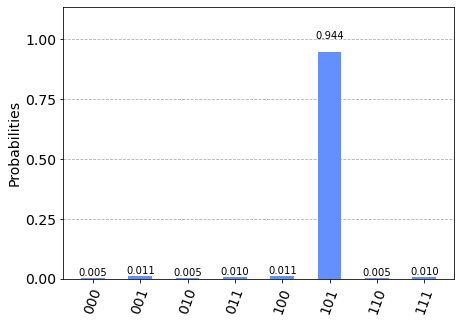

In [19]:
backend = Aer.get_backend('qasm_simulator')
results = execute(grover_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(grover_circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Job Status: job has successfully run


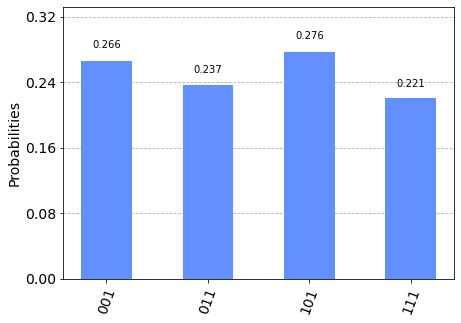

In [8]:
result=job.result()
plot_histogram(result.get_counts(grover_circuit))

In [12]:
nqubits = 4
circuit = QuantumCircuit(nqubits)
for qubit in range(nqubits-1):
    circuit.h(qubit)
for qubit in range(nqubits-1):
    circuit.x(qubit)

circuit.mct(list(range(3)), 3)

for qubit in range(nqubits-1):
    circuit.x(qubit)
for qubit in range(nqubits-1):
    circuit.h(qubit)
circuit.draw()

┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     └───┘└───┘┌─┴─┐└───┘└───┘
q_3: ──────────┤ X ├──────────
               └───┘